# Set-up Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Import the Data

In [2]:
data = pd.read_csv('Dec_Users.csv')
print(data.shape)
data.head()

(3194346, 3)


,registered_user_id,stream_requests,stream_playing_time_combined
0,204e1465-4a3b-4fe4-9a33-741e67120cae,1,1.180
1,e86b7599-fc07-49a7-a56d-f2dd8299585b,7,8178.172
2,9f8f102a-d5a5-4f3a-8dde-5575e0cbe3f9,61,59304.408
3,bd443f09-4fe0-42a8-88c2-5447f009f3df,16,18512.761
4,e0375d89-d0dc-404a-aab4-4b50e20e35b5,5,6598.268


# Select Top 10,000 Rows

In [12]:
data2 = data.iloc[0:10000, :] #10,000th row not included, second number exclusive
print(data2.shape)

(10000, 3)


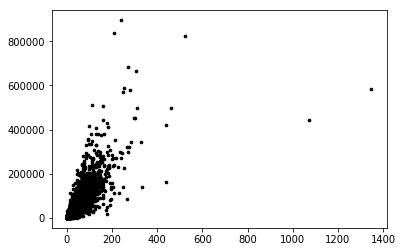

In [5]:
# Getting the values and plotting it
f1 = data2['stream_requests'].values
f2 = data2['stream_playing_time_combined'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [13]:
data3 = data2.loc[data2.stream_requests.values< 600]
print (data3.shape)

(9998, 3)


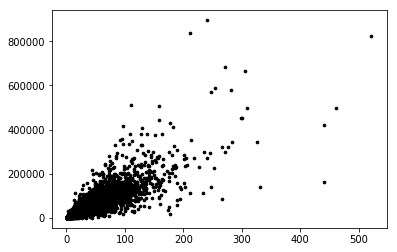

In [14]:
# Getting the values and plotting it
f1 = data3['stream_requests'].values
f2 = data3['stream_playing_time_combined'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [16]:
max(data3.stream_requests)

522

In [17]:
max(data3.stream_playing_time_combined)

895684.45400000003

In [18]:
data3['st_requests'] = data3.stream_requests/522
data3['st_consumption'] = data3.stream_playing_time_combined/895684.454
print(data3.shape)

(9998, 5)


C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


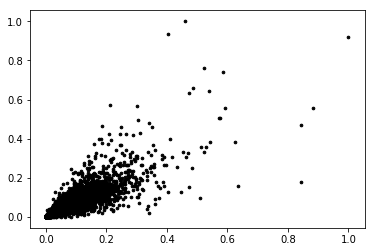

In [19]:
# Getting the values and plotting it
f1 = data3['st_requests'].values
f2 = data3['st_consumption'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [23]:
data3.head()

,registered_user_id,stream_requests,stream_playing_time_combined,st_requests,st_consumption
0,204e1465-4a3b-4fe4-9a33-741e67120cae,1,1.180,0.001916,0.000001
1,e86b7599-fc07-49a7-a56d-f2dd8299585b,7,8178.172,0.013410,0.009131
2,9f8f102a-d5a5-4f3a-8dde-5575e0cbe3f9,61,59304.408,0.116858,0.066211
3,bd443f09-4fe0-42a8-88c2-5447f009f3df,16,18512.761,0.030651,0.020669
4,e0375d89-d0dc-404a-aab4-4b50e20e35b5,5,6598.268,0.009579,0.007367


In [27]:
data4 = data3.loc[:, ['st_requests', 'st_consumption']]
data4.head()

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,st_requests,st_consumption
0,0.001916,0.000001
1,0.013410,0.009131
2,0.116858,0.066211
3,0.030651,0.020669
4,0.009579,0.007367


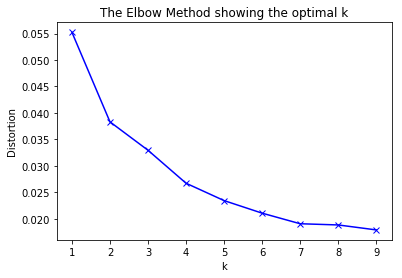

In [29]:
# clustering dataset
# determine k using elbow method
 
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data4)
    kmeanModel.fit(data4)
    distortions.append(sum(np.min(cdist(data4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data4.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
# Initializing KMeans
kmeans = KMeans(n_clusters=7)
# Fitting with inputs
kmeans = kmeans.fit(data4)
# Predicting the clusters
labels = kmeans.predict(data4)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [31]:
C

array([[ 0.01178623,  0.0097133 ],
       [ 0.1976506 ,  0.15847153],
       [ 0.31237614,  0.29112571],
       [ 0.07480175,  0.05821174],
       [ 0.03803873,  0.03558323],
       [ 0.12697107,  0.09592623],
       [ 0.62707535,  0.6306694 ]])

In [36]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [39]:
# Number of clusters
k = 7
# X coordinates of random centroids
C_x = np.random.random((1,7))
# Y coordinates of random centroids
C_y = np.random.random((1,7))
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[[ 0.96738744  0.08603101  0.71769613  0.36775488  0.97417861  0.08151237
    0.53708851]
  [ 0.61715466  0.21090852  0.36865649  0.04833266  0.63598126  0.10917873
    0.94176561]]]


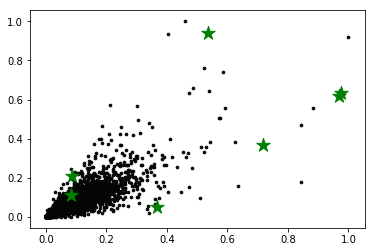

In [44]:
C = [[0.96738744, 0.61715466],[0.08603101, 0.21090852],[0.71769613, 0.36865649],
     [0.36775488, 0.04833266],[0.97417861, 0.63598126],[0.08151237, 0.10917873],
     [0.53708851, 0.94176561]]
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [49]:
data4.head()

,st_requests,st_consumption
0,0.001916,0.000001
1,0.013410,0.009131
2,0.116858,0.066211
3,0.030651,0.020669
4,0.009579,0.007367


In [50]:
from copy import deepcopy

# To store the value of centroids when it updates
C_old = np.zeros((7,2))
# Cluster Lables(0, 1, 2, 3, 4, 5, 6, 7)
clusters = np.zeros(len(data4))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(data4)):
        distances = dist(data4[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [data4[j] for j in range(len(data4)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

KeyError: 0